In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Dataset/housing.csv")

## Data Exploration 🧑🏻‍💻

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
train_data = x_train.join(y_train)

In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13865,-117.30,34.39,11.0,3572.0,592.0,1876.0,507.0,3.6615,INLAND,105100.0
1755,-122.32,37.94,46.0,1901.0,295.0,833.0,352.0,5.5196,NEAR BAY,210800.0
12543,-121.50,38.54,52.0,1145.0,133.0,334.0,138.0,8.3380,INLAND,405800.0
15988,-122.47,37.76,52.0,4001.0,809.0,1886.0,756.0,3.3239,NEAR BAY,350000.0
12192,-117.38,33.67,17.0,10145.0,2306.0,4776.0,1749.0,2.2423,<1H OCEAN,132600.0
...,...,...,...,...,...,...,...,...,...,...
13609,-117.27,34.14,36.0,3795.0,676.0,1742.0,585.0,4.1000,INLAND,96400.0
18700,-122.34,40.58,7.0,4843.0,992.0,2223.0,932.0,3.0549,INLAND,101700.0
893,-121.95,37.54,29.0,3517.0,645.0,1724.0,585.0,4.6641,<1H OCEAN,248900.0
8401,-118.36,33.94,39.0,1390.0,410.0,1666.0,371.0,3.3056,<1H OCEAN,156800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

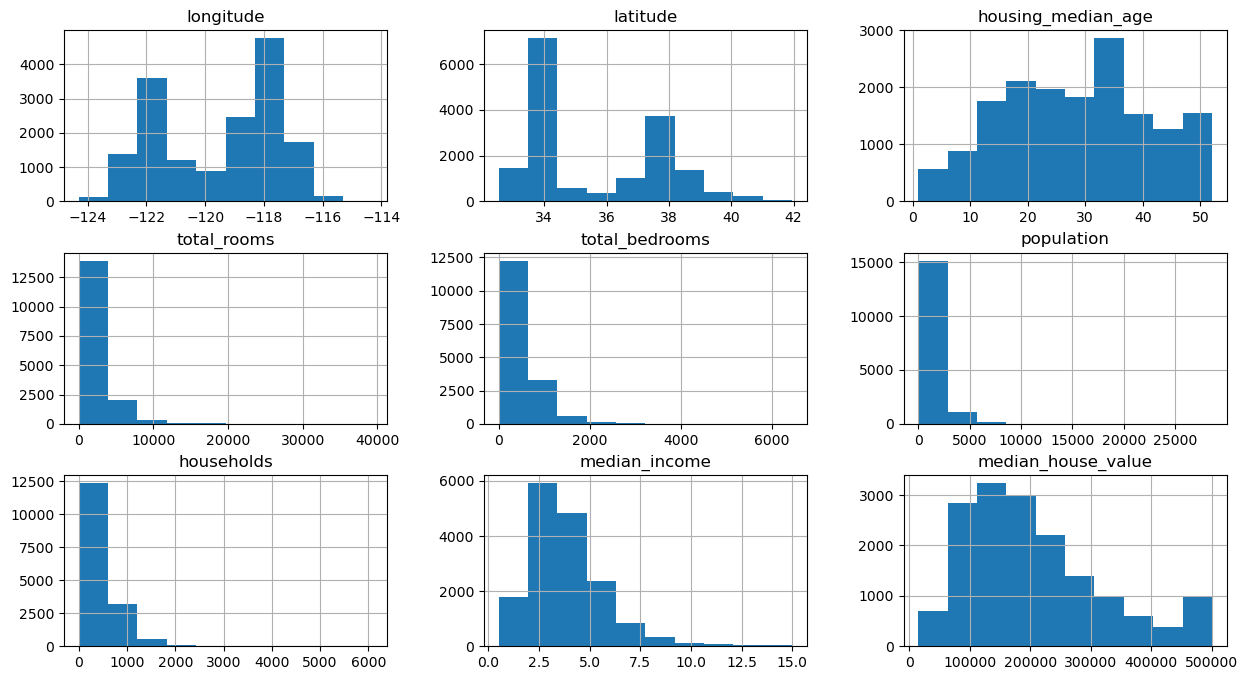

In [11]:
train_data.hist(figsize=(15,8))

<Axes: >

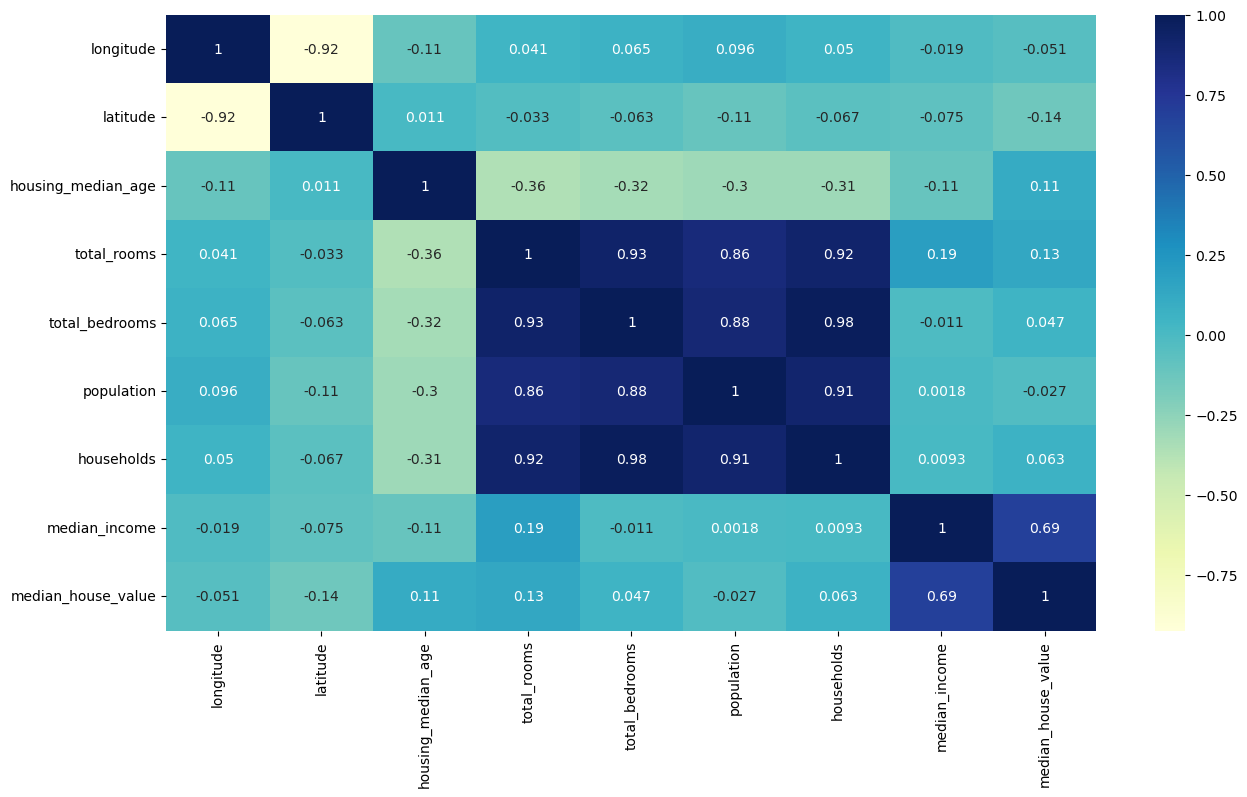

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

# Data Preprocessing 🧑🏻‍💻

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

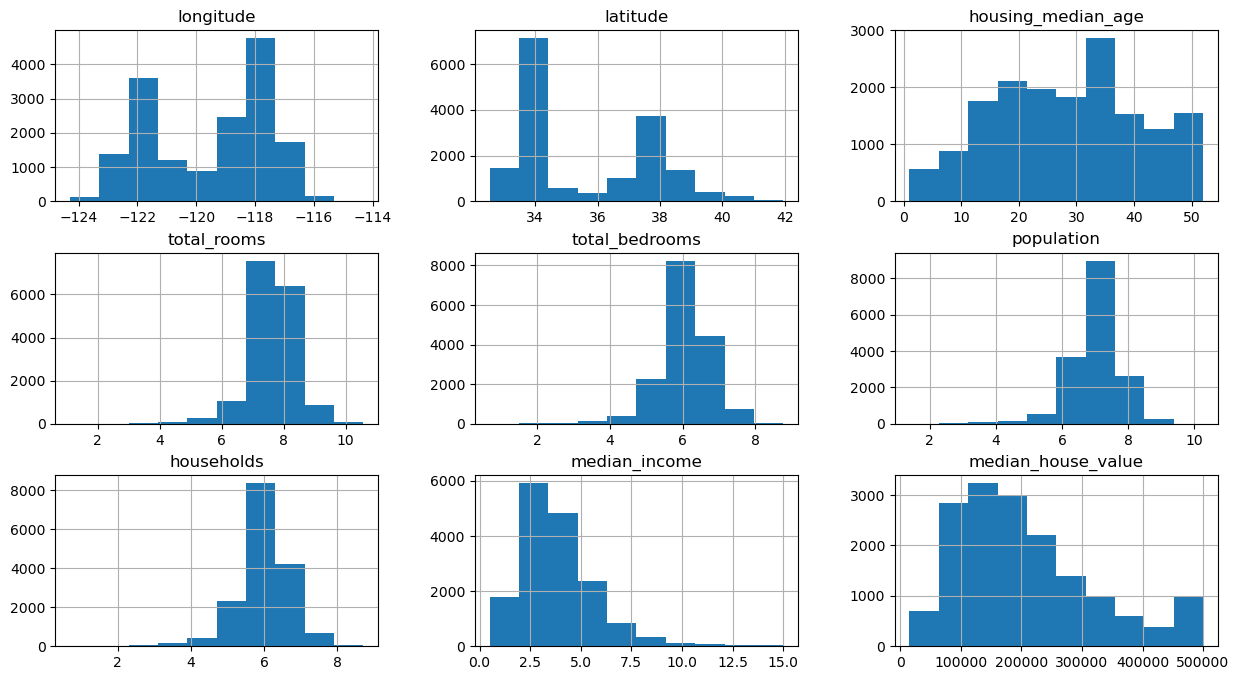

In [14]:
train_data.hist(figsize=(15, 8))

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<Axes: >

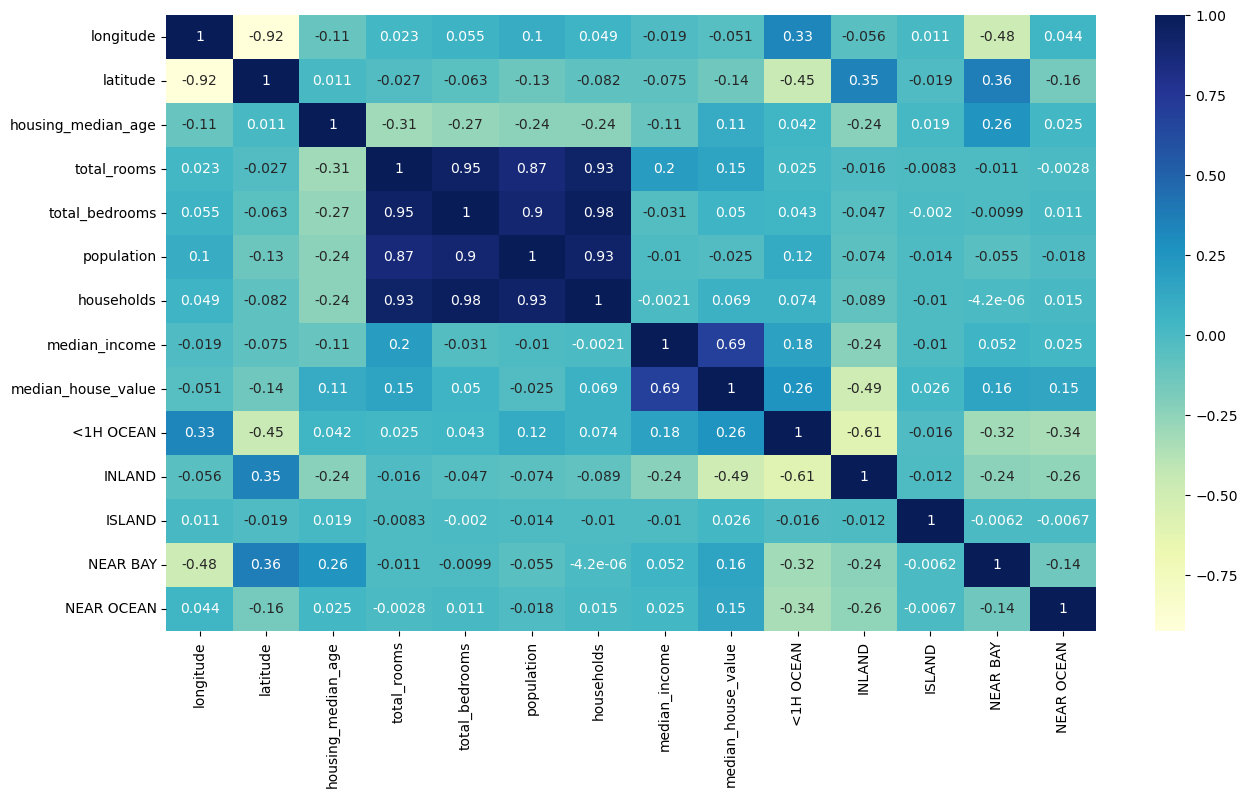

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

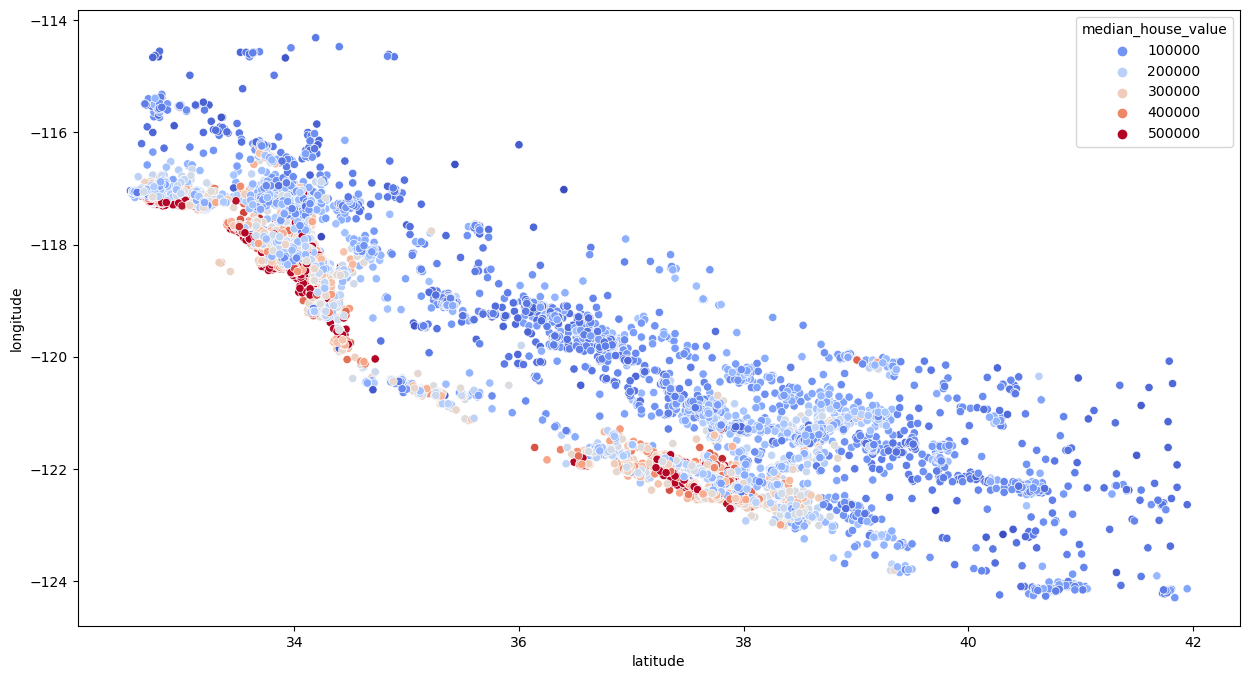

In [17]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

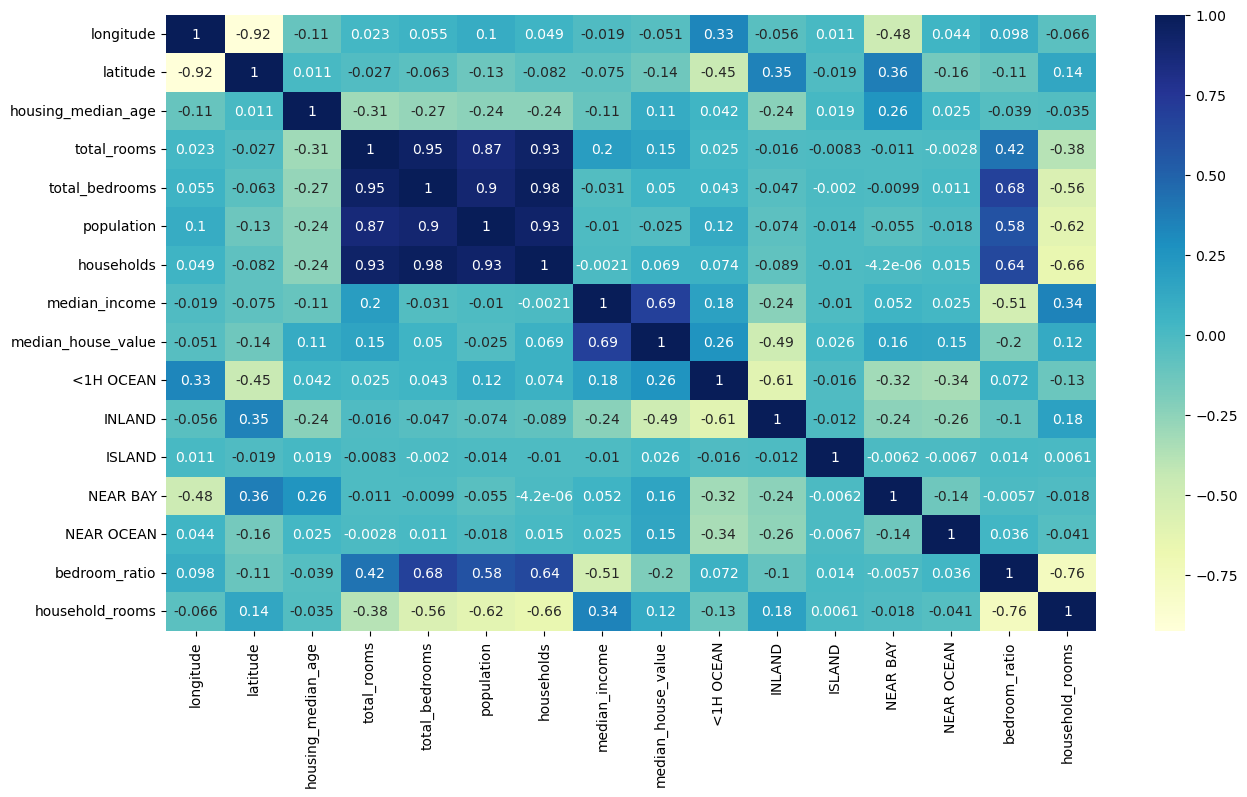

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [20]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [21]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [22]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']